In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#random forest regression

In [2]:
data=pd.read_csv(r"C:\Users\SCET\Downloads\C10_Loan1.csv")
data

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [5]:
Home_Owner={"Home Owner":{"Yes":1,"No":2}}
data=data.replace(Home_Owner)
data

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,Single,125,No
1,2,Married,100,No
2,2,Single,70,No
3,1,Married,120,No
4,2,Divorced,95,Yes
5,2,Married,60,No
6,1,Divorced,220,No
7,2,Single,85,Yes
8,2,Married,75,No
9,2,Single,90,Yes


In [6]:
data.describe()

,Home Owner,Annual Income
count,10.000000,10.000000
mean,1.700000,104.000000
std,0.483046,45.631373
min,1.000000,60.000000
25%,1.250000,77.500000
50%,2.000000,92.500000
75%,2.000000,115.000000
max,2.000000,220.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     int64 
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


In [8]:
data=data.drop(["Marital Status","Defaulted Borrower"],axis=1)
data

,Home Owner,Annual Income
0,1,125
1,2,100
2,2,70
3,1,120
4,2,95
5,2,60
6,1,220
7,2,85
8,2,75
9,2,90


In [9]:
x=data.drop(["Home Owner"],axis=1)
y=data["Home Owner"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
rf=RandomForestClassifier()

In [21]:
params={'max_depth':[1,2,3,4,5],
        'min_samples_leaf':[2,4,6,8,10],
        'n_estimators':[1,3,4,5,7]
       }

In [22]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 4, 5, 7]},
             scoring='accuracy')

In [23]:
gs.best_score_

0.6666666666666666

In [24]:
rf_best=gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=3)

[Text(0.5, 0.5, 'gini = 0.444\nsamples = 4\nvalue = [4, 2]\nclass = Yes')]

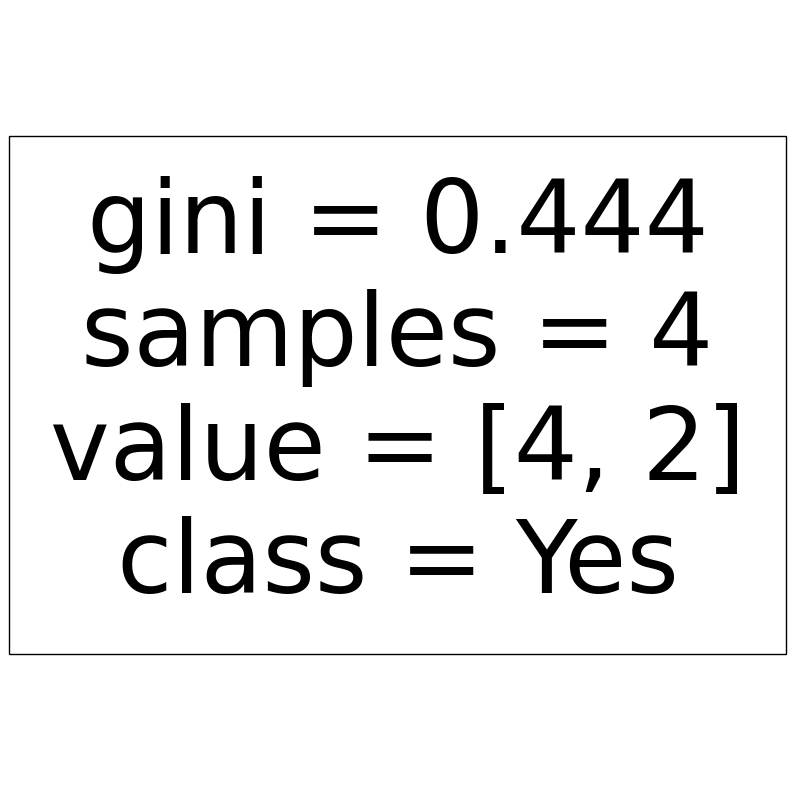

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(rf_best.estimators_[2],feature_names=None,class_names=["Yes","No"])

In [32]:
data1=pd.read_csv(r"C:\Users\SCET\Downloads\C3_Bot_detection_data.csv")
data1

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention
...,...,...,...,...,...,...,...,...,...,...,...
49995,491196,uberg,Want but put card direction know miss former h...,64,0,9911,True,1,Lake Kimberlyburgh,2023-04-20 11:06:26,teach quality ten education any
49996,739297,jessicamunoz,Provide whole maybe agree church respond most ...,18,5,9900,False,1,Greenbury,2022-10-18 03:57:35,add walk among believe
49997,674475,lynncunningham,Bring different everyone international capital...,43,3,6313,True,1,Deborahfort,2020-07-08 03:54:08,onto admit artist first
49998,167081,richardthompson,Than about single generation itself seek sell ...,45,1,6343,False,0,Stephenside,2022-03-22 12:13:44,star


In [33]:
data1.columns

Index(['User ID', 'Username', 'Tweet', 'Retweet Count', 'Mention Count',
       'Follower Count', 'Verified', 'Bot Label', 'Location', 'Created At',
       'Hashtags'],
      dtype='object')

In [34]:
data1.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [36]:
data1=data1.drop(['User ID', 'Username', 'Tweet', 'Verified', 'Location', 'Created At',
       'Hashtags'],axis=1)

In [37]:
data1

,Retweet Count,Mention Count,Follower Count,Bot Label
0,85,1,2353,1
1,55,5,9617,0
2,6,2,4363,0
3,54,5,2242,1
4,26,3,8438,1
...,...,...,...,...
49995,64,0,9911,1
49996,18,5,9900,1
49997,43,3,6313,1
49998,45,1,6343,0


In [51]:
X=data1.drop(["Bot Label"],axis=1)
y=data1["Bot Label"]

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rf=RandomForestClassifier()

In [55]:
params={'max_depth':[1,2,3,4,5],
        'min_samples_leaf':[2,4,6,8,10],
        'n_estimators':[1,3,4,5,7]
       }

In [56]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 4, 5, 7]},
             scoring='accuracy')

In [57]:
gs.best_score_

0.5060666666666667

In [58]:
rf_best=gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=10, n_estimators=3)

[Text(0.5, 0.8333333333333334, 'x[0] <= 84.5\ngini = 0.5\nsamples = 18974\nvalue = [14946, 15054]\nclass = No'),
 Text(0.25, 0.5, 'x[2] <= 9977.5\ngini = 0.5\nsamples = 15951\nvalue = [12479, 12724]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 15914\nvalue = [12431, 12709]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'gini = 0.363\nsamples = 37\nvalue = [48, 15]\nclass = Yes'),
 Text(0.75, 0.5, 'x[1] <= 3.5\ngini = 0.5\nsamples = 3023\nvalue = [2467, 2330]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 1998\nvalue = [1669, 1526]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 1025\nvalue = [798, 804]\nclass = No')]

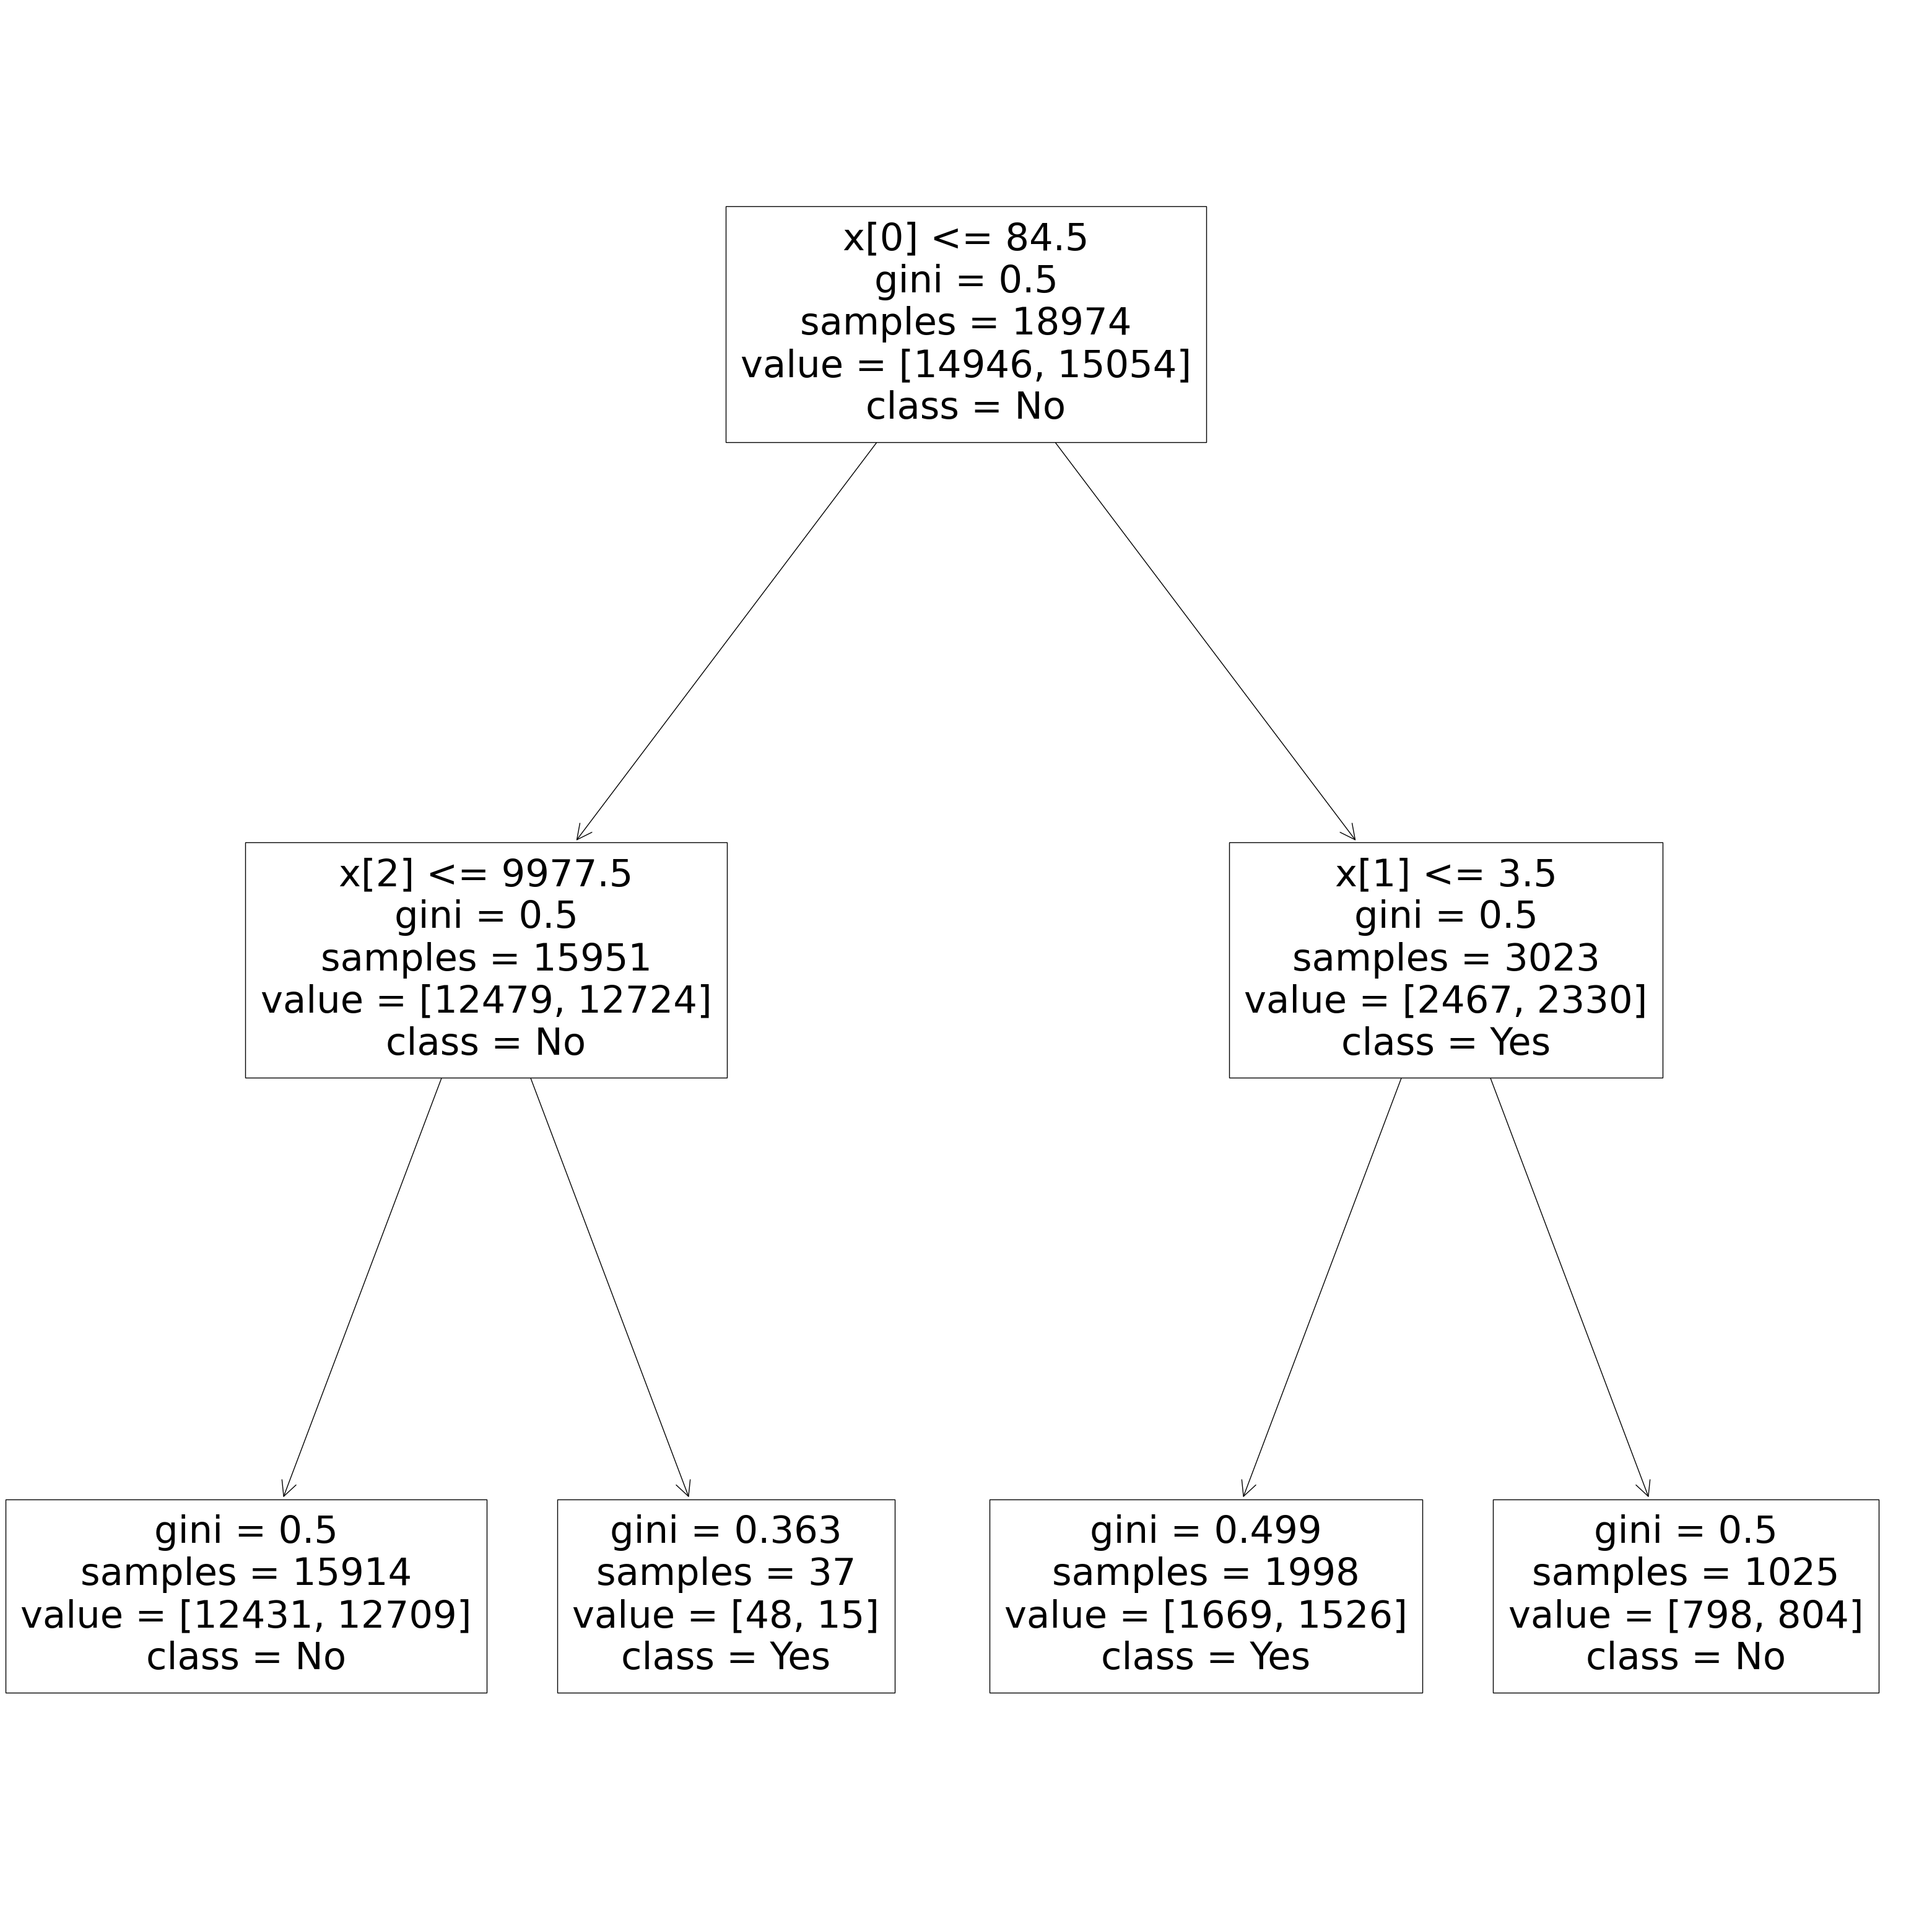

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[2],feature_names=None,class_names=["Yes","No"])